# Product Preprocessing
- 뉴발란스 992 그레이를 기준으로 작성하였으며, 제품 바꿔서 사용하면됨
- data 명은 bunkae로 통일하여서 바꿔줄 필요없음.

### import package

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore') # 빨간색 경고메시지 무시해줌

import matplotlib
matplotlib.rc('font', family='AppleGothic') # Mac OS 한글깨짐 방지
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats # 선명한 그래프
set_matplotlib_formats('retina')

# 데이터프레임이 짤려보이는 것을 해결해줌
pd.options.display.max_rows=100
pd.options.display.max_columns=100
# pd.set_option('display.float_format','{:.4f}'.format) # 숫자포맷설정

### Data Load

In [25]:
bunkae = pd.read_csv('./data/jodan1_mid.csv') # 크롤링한 데이터를 넣어서 사용하세요.

In [26]:
bunkae = bunkae.drop(bunkae.columns[0], axis=1)

### EDA

In [27]:
bunkae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544 entries, 0 to 3543
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ad                      3544 non-null   bool   
 1   bizseller               3544 non-null   bool   
 2   checkout                3544 non-null   bool   
 3   contact_hope            3544 non-null   bool   
 4   free_shipping           3544 non-null   bool   
 5   is_adult                3544 non-null   bool   
 6   is_super_up_shop        0 non-null      float64
 7   location                3067 non-null   object 
 8   max_cpc                 0 non-null      float64
 9   name                    3544 non-null   object 
 10  num_comment             3544 non-null   int64  
 11  num_faved               3544 non-null   int64  
 12  only_neighborhood       3544 non-null   bool   
 13  outlink_url             0 non-null      float64
 14  pid                     3544 non-null   

In [28]:
bunkae.columns

Index(['ad', 'bizseller', 'checkout', 'contact_hope', 'free_shipping',
       'is_adult', 'is_super_up_shop', 'location', 'max_cpc', 'name',
       'num_comment', 'num_faved', 'only_neighborhood', 'outlink_url', 'pid',
       'price', 'product_image', 'pu_id', 'ref_campaign', 'ref_code',
       'ref_medium', 'ref_content', 'ref_source', 'status', 'style',
       'super_up', 'tag', 'uid', 'update_time', 'used',
       'bun_pay_filter_enabled', 'imp_id', 'ad_ref', 'faved', 'datetime',
       'year', 'month', 'day', 'week', 'weekday', 'hour'],
      dtype='object')

In [29]:
columns = ['location', 'name', 'num_faved', 'pid', 'price', 'status', 'uid', 'update_time', 'used', 'datetime']

In [30]:
bunkae_df = bunkae[columns]

In [31]:
### 시간,분,초 삭제하고 새로운 date 컬럼 생성 

def dt_index(x):
    return str(x)[:10]

In [32]:
bunkae_df["date"] = bunkae_df["datetime"].apply(dt_index)
bunkae_df.head(3)

,location,name,num_faved,pid,price,status,uid,update_time,used,datetime,date
0,서울특별시 관악구 신원동,(W) 나이키 조던1 미드 그레이 포그260,3,169284679,305000,0,3948290,1636618936,2,2021-11-11 17:22:16,2021-11-11
1,경기도 파주시 금촌2동,[280]조던 1 짐레드 미드,0,169477465,170000,0,11050524,1636618709,1,2021-11-11 17:18:29,2021-11-11
2,NaN,에어 조던 1 미드 SE,2,165096307,160000,0,12943051,1636618707,2,2021-11-11 17:18:27,2021-11-11


In [33]:
bunkae_df["date"] = pd.to_datetime(bunkae_df["date"]) # date 컬럼 데이터타입을 datetime으로 변경 

In [34]:
bunkae_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544 entries, 0 to 3543
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   location     3067 non-null   object        
 1   name         3544 non-null   object        
 2   num_faved    3544 non-null   int64         
 3   pid          3544 non-null   int64         
 4   price        3544 non-null   int64         
 5   status       3544 non-null   int64         
 6   uid          3544 non-null   int64         
 7   update_time  3544 non-null   int64         
 8   used         3544 non-null   int64         
 9   datetime     3544 non-null   object        
 10  date         3544 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 304.7+ KB


# Product Column Preprocessing

## name 컬럼

- 일단 정확하게 '뉴발란스 992 그레이'라고 적어놓은 제품만 추출함.
- 인덱스는 항상 초기화 해주어야한다.

In [35]:
# 시험삼아 데이터 내에서 검색해보기 (정확한 제품명으로)
product = bunkae_df[bunkae_df['name'].str.contains("조던1 미드 울프 그레이")]
product = product.reset_index(drop=True)
len(product)
# 길이가 아래 키워드목록에 괜찮으면 추가한다.

29

In [36]:
target_string = ['조던', '1', '미드', '울프', '그레이']
product = bunkae_df[bunkae_df['name'].map(lambda x: all(string in x for string in target_string))]
product = product.reset_index(drop=True)

In [37]:
product.shape

(168, 11)

**제품명에서 파생하여 brand, product_name, color 가져옴.**

In [38]:
product['product_name'] = '조던1 미드 울프그레이' # 제품명 입력.

In [39]:
product['brand'] = '조던' # 브랜드 입력.

In [40]:
product['product_type'] = '조던1 미드' # 제품유형

In [41]:
product['color'] = '울프그레이' # 색상 입력.

In [42]:
len(product)

168

In [43]:
# product = product[~product['name'].str.contains('삽니다')]
# product = product[~product['name'].str.contains('구매')]

In [44]:
# # # "삽니다", "구매" 구매요청 게시글 제거
# idx_buying = product[product['name'].str.contains('구매')].index
# df = product.drop(idx_buying)
# product = df

In [45]:
len(product)

168

#### size 처리
- name컬럼에서 숫자만 뽑아낸뒤, 992숫자를 지운다.
- 이상한값들이 많아서 이는 나중에 없애줘야한다.
- 숫자로 변환해서 150~350 사이숫자만 냅두고, 나머지는 Null값으로 둔다.

In [46]:
import re
# name에서 숫자만 추출
number = []
for i in range(0, len(product)):
    number.append(re.sub(r'[^0-9]','',product['name'].values[i]))
product["size"] = pd.DataFrame(number)

In [47]:
product

,location,name,num_faved,pid,price,status,uid,update_time,used,datetime,date,product_name,brand,product_type,color,size
0,부산광역시 남구 용호제1동,조던 1 미드 울프 그레이,0,169604081,310000,0,4747481,1636613395,1,2021-11-11 15:49:55,2021-11-11,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,1
1,서울특별시 서대문구 충현동,[w290]조던1 미드 울프그레이,1,169370834,295000,0,76764290,1636609867,1,2021-11-11 14:51:07,2021-11-11,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,2901
2,NaN,조던1 미드 울프그레이 280,6,168939660,270000,0,77678438,1636604048,1,2021-11-11 13:14:08,2021-11-11,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,1280
3,서울특별시 광진구 능동,W에어조던 1 미드 울프그레이 235사이즈,8,160207153,350000,0,9501687,1636601704,2,2021-11-11 12:35:04,2021-11-11,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,1235
4,서울특별시 영등포구 여의동,조던1 미드 울프그레이 290,16,163620290,349000,0,12040324,1636601268,2,2021-11-11 12:27:48,2021-11-11,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,1290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,경기도 안산시 단원구 신길동,조던1 미드 울프그레이 235,9,161826958,200000,3,8710268,1629377598,1,2021-08-19 21:53:18,2021-08-19,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,1235
164,서울특별시 은평구 진관동,[235] 조던 1 미드 울프 그레이,2,162035548,250000,3,11608043,1629210095,2,2021-08-17 23:21:35,2021-08-17,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,2351
165,NaN,[W255]조던1 미드 울프그레이,3,161752895,220000,3,74970291,1629114264,2,2021-08-16 20:44:24,2021-08-16,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,2551
166,경기도 고양시 일산서구 일산3동,조던 1 미드 울프 그레이 11W (280),2,161860550,235000,3,77226746,1629037422,2,2021-08-15 23:23:42,2021-08-15,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,111280


In [48]:
# 에어조던1의 1을 없애기
def strip_one(x):
    return x.strip('1')

In [49]:
# product['size'] = product['size'].replace('','0') #string
product['size'] = product['size'].apply(strip_one)

In [50]:
set(product['size'])

{'',
 '225',
 '230',
 '2301230',
 '230235',
 '230235245250',
 '230235250275',
 '230240',
 '230245',
 '235',
 '235245',
 '235250',
 '240',
 '240245255270',
 '2406',
 '2406472105',
 '245',
 '245240',
 '2456472105',
 '250',
 '250260275',
 '255',
 '255260265270275280',
 '260',
 '260265',
 '265',
 '2652016',
 '270',
 '275',
 '280',
 '285',
 '290',
 '6472105'}

In [51]:
# 1단계
def size (x):
    return x[0:3]

In [52]:
product['size'] = product['size'].apply(size)

In [53]:
# # 2단계
# int 변환 후 150 ~ 350 사이값
product['size'] = product['size'].replace('','0') #string
product['size'] = product['size'].astype(int)
product = product[(product['size'] >= 200) & (product['size'] <= 350)]

In [54]:
# 3단계
# 뒷자리 5로 나누어 떨어지도록함. (사이즈는 5단위이기 때문)
product = product[product['size'] % 5 == 0]

In [55]:
set(product['size'])

{225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290}

In [56]:
print(product.shape)
product.head(1)

(153, 16)


,location,name,num_faved,pid,price,status,uid,update_time,used,datetime,date,product_name,brand,product_type,color,size
1,서울특별시 서대문구 충현동,[w290]조던1 미드 울프그레이,1,169370834,295000,0,76764290,1636609867,1,2021-11-11 14:51:07,2021-11-11,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,290


## price 컬럼
- 정발가 : 199,000원
<!-- - 나이키 조던1 하이 하이퍼로얄 크림 거래 범위 기준 : 100,000 이상 600,000 이하 -->
- 이상한 값들 제거해야함

In [57]:
set(product['price'])

{1234,
 2345,
 10000,
 11111,
 12345,
 20000,
 55000,
 100000,
 160000,
 170000,
 179000,
 180000,
 190000,
 200000,
 219000,
 220000,
 225000,
 230000,
 235000,
 239000,
 240000,
 245000,
 248000,
 250000,
 255000,
 259000,
 260000,
 269000,
 270000,
 272000,
 275000,
 278000,
 279000,
 280000,
 281000,
 285000,
 288000,
 289000,
 290000,
 291000,
 295000,
 298000,
 299000,
 300000,
 309000,
 310000,
 320000,
 329000,
 339000,
 340000,
 349000,
 350000,
 360000,
 370000,
 379000,
 389000,
 399000,
 400000,
 560000}

In [58]:
# product = product[(product['price'] >= 50000) & (product['price'] <= 600000)] # 시중가격 범위 입력

In [59]:
product['release_price'] = 199000 # 정발가입력

In [60]:
product.head(1)

,location,name,num_faved,pid,price,status,uid,update_time,used,datetime,date,product_name,brand,product_type,color,size,release_price
1,서울특별시 서대문구 충현동,[w290]조던1 미드 울프그레이,1,169370834,295000,0,76764290,1636609867,1,2021-11-11 14:51:07,2021-11-11,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,290,199000


## location 컬럼
- 시/도/구 등 컬럼을 나눠주려고 한다.

In [61]:
product['location'].head()

1    서울특별시 서대문구 충현동
2               NaN
3      서울특별시 광진구 능동
4    서울특별시 영등포구 여의동
5       경기도 시흥시 연성동
Name: location, dtype: object

In [62]:
set(product['location']) # nan존재

{nan,
 '경기도 고양시 일산동구 백석1동',
 '경기도 고양시 일산동구 중산동',
 '경기도 고양시 일산서구 일산2동',
 '경기도 고양시 일산서구 일산3동',
 '경기도 광명시 소하2동',
 '경기도 광주시 경안동',
 '경기도 광주시 광남동',
 '경기도 군포시 금정동',
 '경기도 남양주시 다산1동',
 '경기도 남양주시 다산2동',
 '경기도 남양주시 오남읍',
 '경기도 남양주시 화도읍',
 '경기도 부천시 역곡1동',
 '경기도 부천시 오정동',
 '경기도 부천시 중동',
 '경기도 성남시 분당구 구미동',
 '경기도 성남시 분당구 정자1동',
 '경기도 성남시 수정구 태평1동',
 '경기도 성남시 수정구 태평3동',
 '경기도 성남시 중원구 하대원동',
 '경기도 수원시 권선구 권선1동',
 '경기도 시흥시 연성동',
 '경기도 안산시 단원구 고잔동',
 '경기도 안산시 단원구 신길동',
 '경기도 안산시 상록구 사동',
 '경기도 안산시 상록구 해양동',
 '경기도 안양시 동안구 귀인동',
 '경기도 안양시 동안구 평촌동',
 '경기도 안양시 만안구 석수3동',
 '경기도 양주시 회천3동',
 '경기도 의정부시 송산2동',
 '경기도 평택시 원평동',
 '경기도 포천시 포천동',
 '경상남도 거제시 고현동',
 '경상남도 거제시 연초면',
 '경상남도 산청군 신안면',
 '경상북도 경산시 동부동',
 '경상북도 칠곡군 북삼읍',
 '광주광역시 남구 봉선2동',
 '대구광역시 동구 방촌동',
 '대전광역시 유성구 관평동',
 '대전광역시 유성구 노은1동',
 '부산광역시 금정구 장전제3동',
 '부산광역시 동래구 수민동',
 '부산광역시 부산진구 당감제4동',
 '부산광역시 북구 만덕제2동',
 '부산광역시 수영구 광안제2동',
 '부산광역시 수영구 남천제2동',
 '부산광역시 해운대구 우제2동',
 '부산광역시 해운대구 재송제1동',
 '부산광역시 해운대구 좌제4동',
 '서울특별시 강남구 대치2동',
 '서울특별시 강남구 신사동',
 '서

In [63]:
product['location'] = product['location'].fillna('NULL')

In [64]:
def first_split(x):
    first = x.find(' ')
    return x[:first]

def second_split(x):
    first = x.find(' ')
    second = x.find(' ', first+1)
    return x[first+1:second]

def third_split(x):
    first = x.find(' ')
    second = x.find(' ', first+1)
    third = x.find(' ', second+1)
    return x[second+1:]

In [65]:
product['location1'] = product['location'].apply(first_split)
product['location2'] = product['location'].apply(second_split)
product['location3'] = product['location'].apply(third_split)

In [66]:
product

,location,name,num_faved,pid,price,status,uid,update_time,used,datetime,date,product_name,brand,product_type,color,size,release_price,location1,location2,location3
1,서울특별시 서대문구 충현동,[w290]조던1 미드 울프그레이,1,169370834,295000,0,76764290,1636609867,1,2021-11-11 14:51:07,2021-11-11,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,290,199000,서울특별시,서대문구,충현동
2,NULL,조던1 미드 울프그레이 280,6,168939660,270000,0,77678438,1636604048,1,2021-11-11 13:14:08,2021-11-11,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,280,199000,NUL,NUL,NULL
3,서울특별시 광진구 능동,W에어조던 1 미드 울프그레이 235사이즈,8,160207153,350000,0,9501687,1636601704,2,2021-11-11 12:35:04,2021-11-11,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,235,199000,서울특별시,광진구,능동
4,서울특별시 영등포구 여의동,조던1 미드 울프그레이 290,16,163620290,349000,0,12040324,1636601268,2,2021-11-11 12:27:48,2021-11-11,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,290,199000,서울특별시,영등포구,여의동
5,경기도 시흥시 연성동,나이키 조던1 미드 울프그레이 250,14,169271698,220000,0,1226483,1636600008,1,2021-11-11 12:06:48,2021-11-11,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,250,199000,경기도,시흥시,연성동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,경기도 안산시 단원구 신길동,조던1 미드 울프그레이 235,9,161826958,200000,3,8710268,1629377598,1,2021-08-19 21:53:18,2021-08-19,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,235,199000,경기도,안산시,단원구 신길동
164,서울특별시 은평구 진관동,[235] 조던 1 미드 울프 그레이,2,162035548,250000,3,11608043,1629210095,2,2021-08-17 23:21:35,2021-08-17,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,235,199000,서울특별시,은평구,진관동
165,NULL,[W255]조던1 미드 울프그레이,3,161752895,220000,3,74970291,1629114264,2,2021-08-16 20:44:24,2021-08-16,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,255,199000,NUL,NUL,NULL
166,경기도 고양시 일산서구 일산3동,조던 1 미드 울프 그레이 11W (280),2,161860550,235000,3,77226746,1629037422,2,2021-08-15 23:23:42,2021-08-15,조던1 미드 울프그레이,조던,조던1 미드,울프그레이,280,199000,경기도,고양시,일산서구 일산3동


## Duplicate 제거
- pid기준으로 중복제거

In [67]:
def deduplicator(df):
    df = df.drop_duplicates(['pid'], keep='first')
    return df

In [68]:
len(product)

153

In [69]:
len(deduplicator(product))

153

# 저장

In [70]:
product.to_csv('./data/jodan1_mid_wolfgray.csv')

In [71]:
len(product.columns)

20

<AxesSubplot:xlabel='datetime', ylabel='price'>

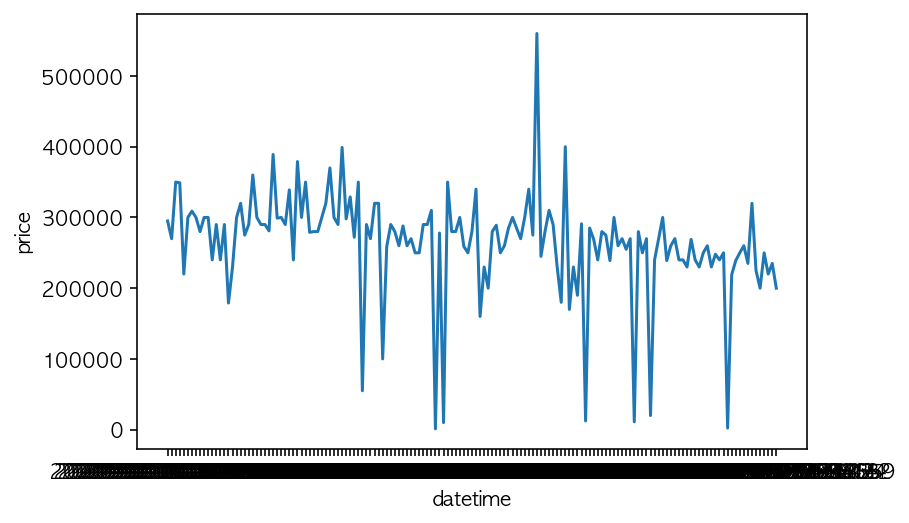

In [72]:
sns.lineplot(data = product, x='datetime', y='price')